In [1]:
import pandas as pd
import datetime

In [2]:
# Task 1
# Examine the data, parse the time fields wherever necessary.
# Take the sum of the energy usage (use[kW]) to get per day usage and merge it with weather data

energy_df = pd.read_csv('energy_data.csv')
weather_df = pd.read_csv('weather_data.csv')

energy_df.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


In [3]:
weather_df.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,1388545200,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,1388548800,217,0.0,5.87,0.0


In [4]:
# parse time of weather
weather_df['time'] = pd.to_datetime(weather_df['time'], unit="s")
weather_df.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,2014-01-01 00:00:00,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,2014-01-01 01:00:00,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,2014-01-01 02:00:00,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,2014-01-01 03:00:00,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,2014-01-01 04:00:00,217,0.0,5.87,0.0


In [5]:
# split up energy date and time into two columns

weather_df['Date'] = pd.to_datetime(weather_df['time']).dt.date
weather_df['Time'] = pd.to_datetime(weather_df['time']).dt.time
weather_df.rename(columns= {'time': 'Date & Time'}, inplace=True)

energy_df['Date'] = pd.to_datetime(energy_df['Date & Time']).dt.date
energy_df['Time'] = pd.to_datetime(energy_df['Date & Time']).dt.time

weather_df.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,Date & Time,windBearing,precipIntensity,dewPoint,precipProbability,Date,Time
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,2014-01-01 00:00:00,279,0.0,23.89,0.0,2014-01-01,00:00:00
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,2014-01-01 01:00:00,195,0.0,5.87,0.0,2014-01-01,01:00:00
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,2014-01-01 02:00:00,222,0.0,6.17,0.0,2014-01-01,02:00:00
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,2014-01-01 03:00:00,209,0.0,5.63,0.0,2014-01-01,03:00:00
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,2014-01-01 04:00:00,217,0.0,5.87,0.0,2014-01-01,04:00:00


In [6]:
energy_df.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW],Date,Time
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589,2014-01-01,00:00:00
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008,2014-01-01,00:30:00
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928,2014-01-01,01:00:00
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472,2014-01-01,01:30:00
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798,2014-01-01,02:00:00


In [7]:
# Take the sum of the energy usage (use[kW]) to get per day usage and merge it with weather data
usage_df = energy_df.groupby('Date')[['use [kW]']].sum()
usage_df

,use [kW]
Date,
2014-01-01,65.013592
2014-01-02,32.305336
2014-01-03,31.164468
2014-01-04,45.287782
2014-01-05,36.316643
...,...
2014-12-27,35.046127
2014-12-28,37.695824
2014-12-29,28.675929


In [8]:
# have one weather row per day
# average of the number values per day
# exclude "icon" and "summary"
daily_df = weather_df.groupby('Date')[['temperature', 'humidity', 'visibility', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability']].mean()

In [9]:
daily_df

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
Date,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...
2014-12-27,35.487083,0.756250,9.246250,1022.081667,3.677083,0.030417,243.791667,0.000000,27.992500,0.000000
2014-12-28,41.892917,0.763750,9.332917,1013.549167,6.587917,0.245909,224.458333,0.003996,34.876250,0.137917
2014-12-29,34.728333,0.592083,9.997083,1018.870833,8.129583,0.119167,281.833333,0.000000,21.570000,0.000000


In [10]:
df = pd.merge(daily_df, usage_df, on="Date")
df

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,use [kW]
Date,,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000,65.013592
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583,32.305336
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000,31.164468
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000,45.287782
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417,36.316643
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,35.487083,0.756250,9.246250,1022.081667,3.677083,0.030417,243.791667,0.000000,27.992500,0.000000,35.046127
2014-12-28,41.892917,0.763750,9.332917,1013.549167,6.587917,0.245909,224.458333,0.003996,34.876250,0.137917,37.695824
2014-12-29,34.728333,0.592083,9.997083,1018.870833,8.129583,0.119167,281.833333,0.000000,21.570000,0.000000,28.675929


In [11]:
# Task 2
# Split the data obtained from step 1, into training and testing sets. The aim is to predict the usage
# for each day in the month of December using the weather data, so split accordingly. The usage
# as per devices should be dropped, only the “use [kW]” column is to be used for prediction from the dataset

# training set (days before December)
# splitting dataframe by row index
december = datetime.date(2014, 12, 1)
train_x = df[df.index < december] # df.iloc[:334]
train_y = train_x['use [kW]']
train_x = train_x.drop(['use [kW]'], axis=1)

# testing set (all days in December)
test_x = df[df.index >= december] # df.iloc[334:]
test_y = test_x['use [kW]']
test_x = test_x.drop(['use [kW]'], axis=1)

In [12]:
train_x

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
Date,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...
2014-11-26,36.385000,0.778333,6.551667,1019.266250,6.445833,0.171333,185.375000,0.024837,29.875417,0.291250
2014-11-27,31.992500,0.847083,7.394583,1012.272917,7.599167,0.420769,316.833333,0.006033,27.862083,0.160417
2014-11-28,29.126250,0.763750,8.919167,1018.359583,6.599167,0.268947,316.416667,0.000271,22.335000,0.006667


In [13]:
train_y

Date
2014-01-01    65.013592
2014-01-02    32.305336
2014-01-03    31.164468
2014-01-04    45.287782
2014-01-05    36.316643
                ...    
2014-11-26    27.712850
2014-11-27    30.114004
2014-11-28    26.348404
2014-11-29    20.241298
2014-11-30    32.239043
Name: use [kW], Length: 334, dtype: float64

In [14]:
test_x.head()

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
Date,,,,,,,,,,
2014-12-01,45.276250,0.722083,9.656667,1018.805417,6.397083,0.263333,226.958333,0.000000,36.748750,0.000000
2014-12-02,34.177917,0.582917,9.839583,1034.805833,7.527083,0.121818,166.625000,0.000000,21.006250,0.000000
2014-12-03,36.345833,0.911250,4.939167,1022.247500,5.691250,0.862000,119.333333,0.010754,33.994167,0.240833
2014-12-04,36.216250,0.584167,9.976667,1024.064583,9.129583,0.130000,286.125000,0.000371,22.777500,0.010000
2014-12-05,27.463750,0.698750,9.847083,1035.654167,3.421667,0.069130,63.833333,0.000000,18.462083,0.000000


In [15]:
test_y.head()

Date
2014-12-01    30.550010
2014-12-02    31.748857
2014-12-03    28.773233
2014-12-04    39.484491
2014-12-05    33.342503
Name: use [kW], dtype: float64

In [16]:
# Task 3
# Linear Regression - Predicting Energy Usage:

# Set up a simple linear regression model to train, and then predict energy usage for each day in
# the month of December using features from weather data (Note that you need to drop the “use
# [kW]” column in the test set first). How well/badly does the model work? (Evaluate the correctness of your predictions based on the original “use [kW]” column). 
# Calculate the Root Mean Squared error of your model
# Finally generate a csv dump of the predicted values.
# Format of csv: Two columns, first should be the date and second should be the predicted value.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = train_x
y = train_y
reg = LinearRegression().fit(X, y)
predicted = reg.predict(test_x)

mean_squared_error(test_y, predicted, squared=False)

8.740566311138375

In [17]:
# Finally generate a csv dump of the predicted values.
# Format of csv: Two columns, first should be the date and second should be the predicted value.

dates_list = [datetime.datetime.strftime(date, "%Y/%m/%d") for date in test_x.index]

csv_dump = pd.DataFrame(data=predicted, index=dates_list, columns=["Predicted Value"])
csv_dump.index.name = "Date"
csv_dump.to_csv('cse351_hw2_Lee_Cynthia_111737790_linear_regression.csv')

In [18]:
# How well/badly does the model work?

# The root mean squared error is 8.740566311138375. A great model would have the root mean squared error very close to 0.
# A lower RMSE means a better model.
# This model was not that good.

In [19]:
# Task 4

# Logistic Regression - Temperature classification:

# Using only weather data we want to classify if the temperature is high or low. Let's assume 
# temperature greater than or equal to 60 is ‘high’ and below 60 is ‘low’. Set up a logistic
# regression model to classify the temperature for each day in the month of December. Calculate the F1 score for the model.
# Finally generate a csv dump of the classification (1 for high, 0 for low)
# Format: Two columns, first should be the date and second should be the classification (1/0).

# treshold changed to 35

temp_df = daily_df.copy()
temp_df.loc[temp_df['temperature'] >= 35, 'temp'] = 1 # high
temp_df.loc[temp_df['temperature'] < 35, 'temp'] = 0 # low
temp_df.drop(['temperature'], axis=1)

,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,temp
Date,,,,,,,,,,
2014-01-01,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000,0.0
2014-01-02,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583,0.0
2014-01-03,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000,0.0
2014-01-04,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000,0.0
2014-01-05,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417,0.0
...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.756250,9.246250,1022.081667,3.677083,0.030417,243.791667,0.000000,27.992500,0.000000,1.0
2014-12-28,0.763750,9.332917,1013.549167,6.587917,0.245909,224.458333,0.003996,34.876250,0.137917,1.0
2014-12-29,0.592083,9.997083,1018.870833,8.129583,0.119167,281.833333,0.000000,21.570000,0.000000,0.0


In [20]:
# splitting the data

# training set (days before December)
# splitting dataframe by row index
december = datetime.date(2014, 12, 1)
train_x = temp_df[temp_df.index < december]
train_y = train_x['temp']
train_x = train_x.drop(['temp'], axis=1)

# testing set (all days in December)
test_x = temp_df[temp_df.index >= december]
test_y = test_x['temp']
test_x = test_x.drop(['temp'], axis=1)

In [21]:
train_x

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
Date,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...
2014-11-26,36.385000,0.778333,6.551667,1019.266250,6.445833,0.171333,185.375000,0.024837,29.875417,0.291250
2014-11-27,31.992500,0.847083,7.394583,1012.272917,7.599167,0.420769,316.833333,0.006033,27.862083,0.160417
2014-11-28,29.126250,0.763750,8.919167,1018.359583,6.599167,0.268947,316.416667,0.000271,22.335000,0.006667


In [22]:
# logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# scale data
scaler = StandardScaler().fit(train_x)
s_train_x = scaler.transform(train_x)
s_test_x = scaler.transform(test_x)

X = s_train_x
y = train_y
reg = LogisticRegression().fit(X, y)
predicted = reg.predict(s_test_x)

f1_score(test_y, predicted)

0.8125000000000001

In [23]:
# Finally generate a csv dump of the classification (1 for high, 0 for low)
# Format: Two columns, first should be the date and second should be the classification (1/0).

dates_list = [datetime.datetime.strftime(date, "%Y/%m/%d") for date in test_x.index]

csv_dump = pd.DataFrame(data=predicted, index=dates_list, columns=["Classification"])
csv_dump.index.name = "Date"
csv_dump.to_csv('cse351_hw2_Lee_Cynthia_111737790_logistic_regression.csv')

In [24]:
# Task 5

# Energy usage data Analysis:

# We want to analyze how different devices are being used in different times of the day.
# - Is the washer being used only during the day?
# - During what time of the day is AC used most?
# There are a number of questions that can be asked.
# For simplicity, let’s divide a day in two parts:
# - Day : 6AM - 7PM
# - Night: 7PM - 6AM
# Analyze the usage of any two devices of your choice during the ‘day’ and ‘night’. Plot these
# trends. Explain your findings.

energy_df.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW],Date,Time
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589,2014-01-01,00:00:00
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008,2014-01-01,00:30:00
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928,2014-01-01,01:00:00
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472,2014-01-01,01:30:00
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798,2014-01-01,02:00:00


In [25]:
# assign day into to parts
day_energy_df = energy_df.copy()

start = datetime.time(6,0)
end = datetime.time(19,0)
time = day_energy_df['Time']
day_energy_df.loc[((start <= time) | (time < end)), 'Day'] = 1 # day

start = datetime.time(19,0)
end = datetime.time(6,0)
day_energy_df.loc[((start <= time) | (time < end)), 'Day'] = 0 # night

day_energy_df = day_energy_df.drop(['Time', 'Date & Time'], axis=1)
day_energy_df

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW],Date,Day
0,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589,2014-01-01,0.0
1,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008,2014-01-01,0.0
2,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928,2014-01-01,0.0
3,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472,2014-01-01,0.0
4,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798,2014-01-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,1.560890,0.0,1.560890,0.003226,0.392996,0.006342,0.000872,0.030453,0.002248,0.004817,0.278941,0.000120,0.000292,0.007983,0.033991,0.003702,0.002906,2014-12-31,0.0
17516,0.958447,0.0,0.958447,0.000827,0.027369,0.006326,0.000811,0.030391,0.002543,0.004724,0.243128,0.000139,0.000334,0.006178,0.034535,0.004464,0.113162,2014-12-31,0.0
17517,0.834462,0.0,0.834462,0.001438,0.170561,0.020708,0.000636,0.012631,0.002372,0.004711,0.204744,0.000087,0.000341,0.005684,0.034484,0.004502,0.051604,2014-12-31,0.0
17518,0.543863,0.0,0.543863,0.001164,0.153533,0.008423,0.000553,0.003832,0.002353,0.004736,0.177276,0.000109,0.000373,0.005160,0.025601,0.004647,0.039409,2014-12-31,0.0


In [26]:
# Analyze the usage of any two devices of your choice during the ‘day’ and ‘night’. 
# Plot these trends. Explain your findings.

# Choosen devices: Furnace, Washer

devices_df = day_energy_df.filter(['Washer [kW]','Furnace [kW]','Date','Day'], axis=1)
devices_df

,Washer [kW],Furnace [kW],Date,Day
0,0.000126,0.009531,2014-01-01,0.0
1,0.000043,0.364338,2014-01-01,0.0
2,0.000044,0.417989,2014-01-01,0.0
3,0.000059,0.410653,2014-01-01,0.0
4,0.000119,0.017152,2014-01-01,0.0
...,...,...,...,...
17515,0.000872,0.392996,2014-12-31,0.0
17516,0.000811,0.027369,2014-12-31,0.0
17517,0.000636,0.170561,2014-12-31,0.0
17518,0.000553,0.153533,2014-12-31,0.0


In [27]:
washer_df = day_energy_df.filter(['Washer [kW]','Date','Day'], axis=1)
furnace_df = day_energy_df.filter(['Furnace [kW]','Date','Day'], axis=1)

Text(0.5, 0, 'Time of Day')

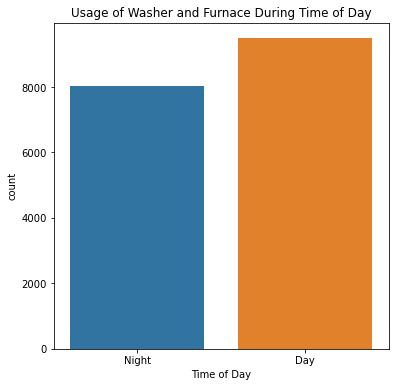

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plot = sns.countplot(x="Day", data=devices_df)
plot.set_title("Usage of Washer and Furnace During Time of Day")
plot.set_xticklabels(["Night", "Day"])
plot.set_xlabel("Time of Day")

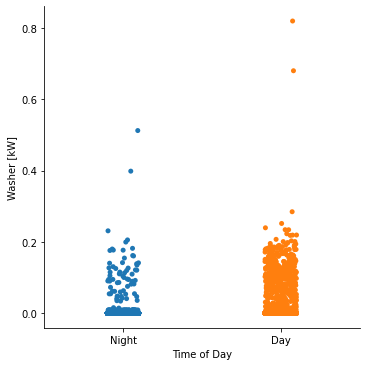

In [29]:
# Is the washer only being used during the day? No
# Used most during the day

plot = sns.catplot(data=washer_df, x="Day", y="Washer [kW]")
plot.set_titles("Usage of Washer and Furnace During Time of Day")
plot.set_xticklabels(["Night", "Day"])
plot.set_xlabels("Time of Day")

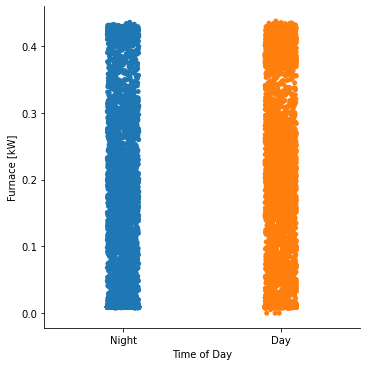

In [30]:
# The furnace is used both day and night

plot = sns.catplot(data=furnace_df, x="Day", y="Furnace [kW]")
plot.set_titles("Usage of Washer and Furnace During Time of Day")
plot.set_xticklabels(["Night", "Day"])
plot.set_xlabels("Time of Day")

Text(0.5, 1.0, 'Usage of Washer')

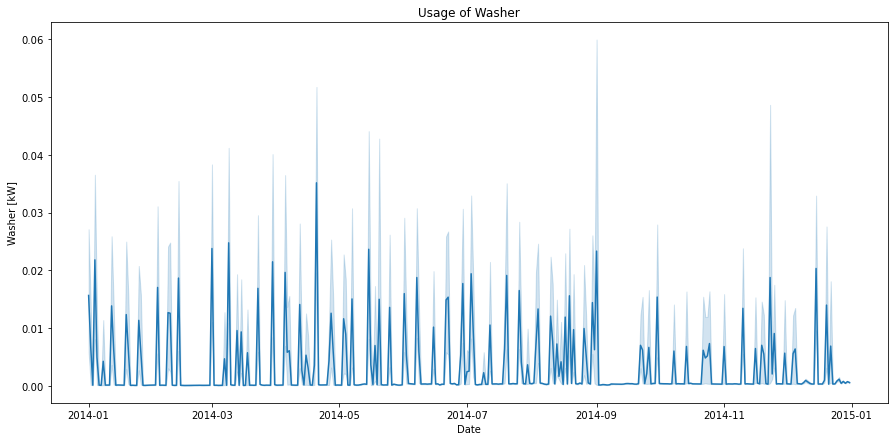

In [31]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=washer_df, x="Date", y="Washer [kW]").set_title("Usage of Washer")

# Washer has a lot of small periods of not being used 
# there is a pattern of not being used and then a spike and then not being used again
# perhaps this household does laundry every 1 or 2 weeks which explains this pattern, laundry is not done every day
# during the spikes, laundry is done throughout the year as shown with the washer usage

Text(0.5, 1.0, 'Usage of Furnace')

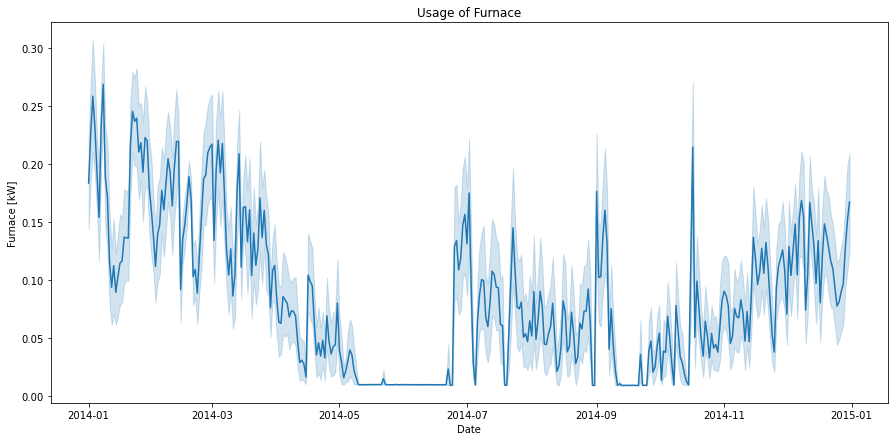

In [32]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=furnace_df, x="Date", y="Furnace [kW]").set_title("Usage of Furnace")

# Furnace hasn't had much usage at all during some time periods after 2014-5 and before 2014-7
# also during the time period around the end of 2014-9
# perhaps this household has taken a vacation during the summer months and left the house
# during the vacation they did not use their kitchen/furnace

# Furnace usage kW is higher during the months of 1-3 (January to March) compared to 7-11 (July to November)
# perhaps bigger and warmer meals are cooked furing the winter time compared to the spring and summer 
# bigger and warmer meals would require more furnace usage

Text(0.5, 1.0, 'Usage of Washer During the Day')

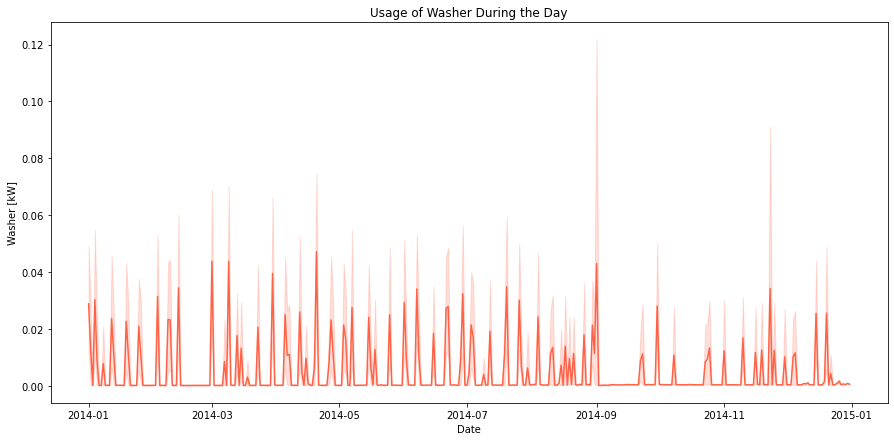

In [33]:
washer_day_df = washer_df.loc[washer_df['Day'] == 1]
washer_night_df = washer_df.loc[washer_df['Day'] == 0]

plt.figure(figsize=(15, 7))
sns.lineplot(data=washer_day_df, x="Date", y="Washer [kW]", color="tomato").set_title("Usage of Washer During the Day")

Text(0.5, 1.0, 'Usage of Washer During the Night')

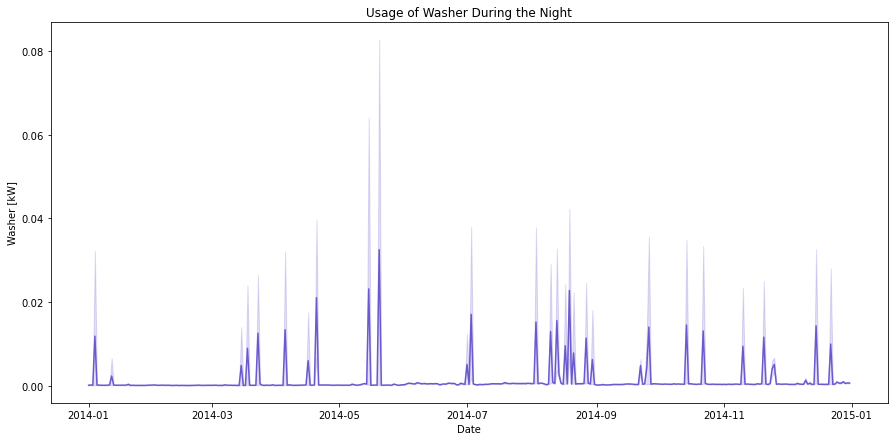

In [34]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=washer_night_df, x="Date", y="Washer [kW]", color="slateblue").set_title("Usage of Washer During the Night")

# washer is used less frequently during the night
# perhaps washing clothes is easier to deal during the day if some delicate clothes need to be hung up to dry
# or perhaps this household prefers to do laundry during the day

Text(0.5, 1.0, 'Usage of Furnace During the Day')

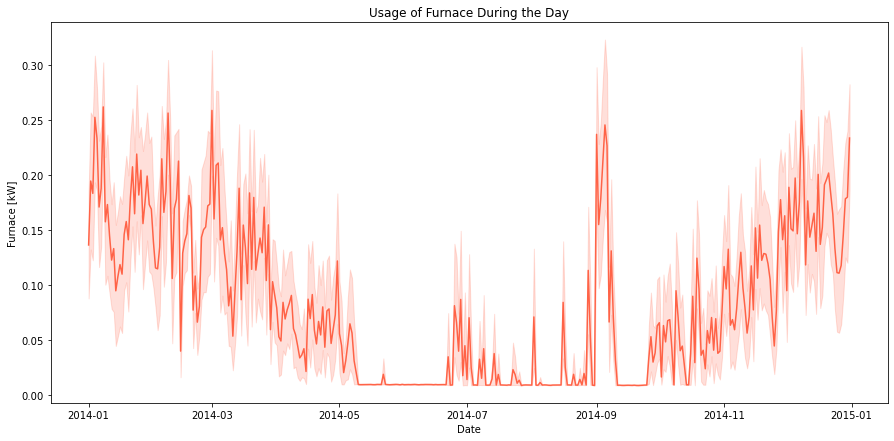

In [35]:
furnace_day_df = furnace_df.loc[furnace_df['Day'] == 1]
furnace_night_df = furnace_df.loc[furnace_df['Day'] == 0]

plt.figure(figsize=(15, 7))
sns.lineplot(data=furnace_day_df, x="Date", y="Furnace [kW]", color="tomato").set_title("Usage of Furnace During the Day")

Text(0.5, 1.0, 'Usage of Furnace During the Night')

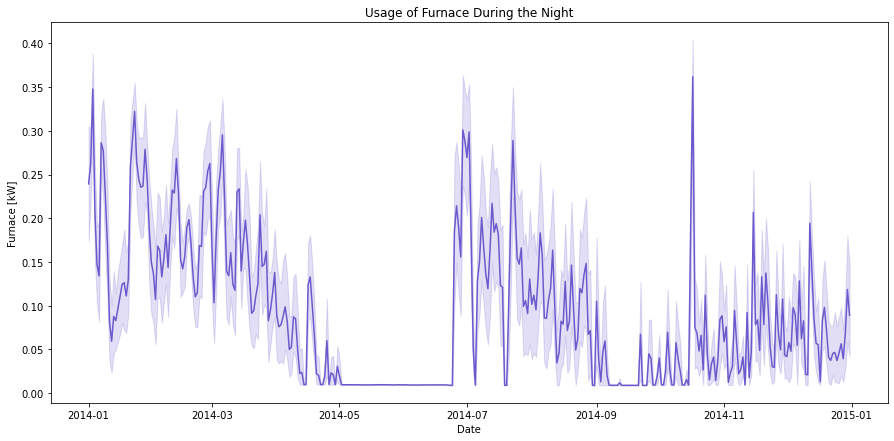

In [36]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=furnace_night_df, x="Date", y="Furnace [kW]", color="slateblue").set_title("Usage of Furnace During the Night")

# furnace usage used both during the day and night, probably because of cooking meals during the day and night
# ex. breakfast during the day, lunch, dinner during the night

Text(0.5, 1.0, 'Usage of Washer During the Day')

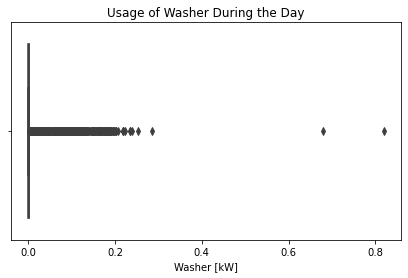

In [37]:
plt.figure(figsize=(7, 4))
sns.boxplot(x="Washer [kW]", data=washer_day_df).set_title("Usage of Washer During the Day")

Text(0.5, 1.0, 'Usage of Washer During the Night')

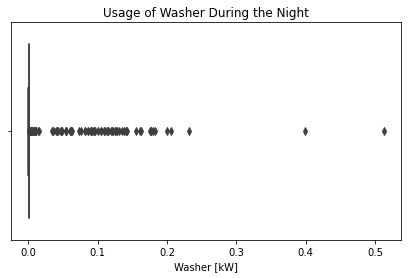

In [38]:
plt.figure(figsize=(7, 4))
sns.boxplot(x="Washer [kW]", data=washer_night_df).set_title("Usage of Washer During the Night")

Text(0.5, 1.0, 'Usage of Furnace During the Day')

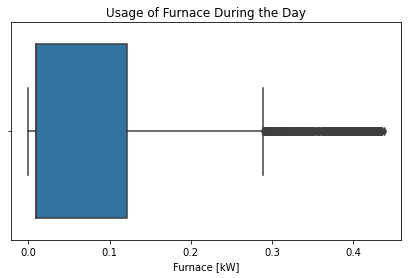

In [39]:
plt.figure(figsize=(7, 4))
sns.boxplot(x="Furnace [kW]", data=furnace_day_df).set_title("Usage of Furnace During the Day")

Text(0.5, 1.0, 'Usage of Furnace During the Night')

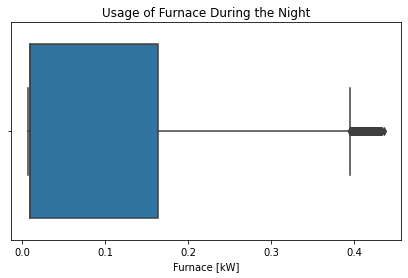

In [40]:
plt.figure(figsize=(7, 4))
sns.boxplot(x="Furnace [kW]", data=furnace_night_df).set_title("Usage of Furnace During the Night")
# furnace usage during the night has an average of more datapoints with higher values than during the day
# perhaps dinner requires more furnace usage than breakfast 
# as dinner meals tend to be more hearty and bigger than breakfast meals